In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing", "Tijuana", "Cancun", "Montreal"]
# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 32.5333, 21.1743, 45.5088]
The temperature information received is: [17.45, 14.37, 15.16, 23.94, 27.37, 30.03, 21.09]


In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,17.45
1,London,51.5085,14.37
2,Oslo,59.9127,15.16
3,Beijing,39.9075,23.94
4,Tijuana,32.5333,27.37
5,Cancun,21.1743,30.03
6,Montreal,45.5088,21.09


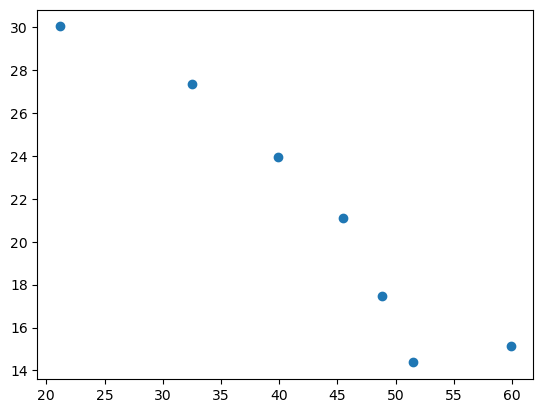

In [8]:
# Create a Scatter Plot for temperature vs latitude
plt.scatter(weather_data["lat"], weather_data["temp"])

In [9]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data["lat"], weather_data["temp"])

# Get regression values
estimated_values = weather_data["lat"] * slope + intercept 
estimated_values


0    18.603083
1    17.406446
2    13.618726
3    22.634944
4    25.958449
5    31.077879
6    20.110473
Name: lat, dtype: float64

In [10]:
# Create line equation string
print("Y = " + str(slope) + "X + " + str(intercept))

Y = -0.4506936913232314X + 40.62100216309121


Text(25, 15, 'Y = -0.4506936913232314X + 40.62100216309121')

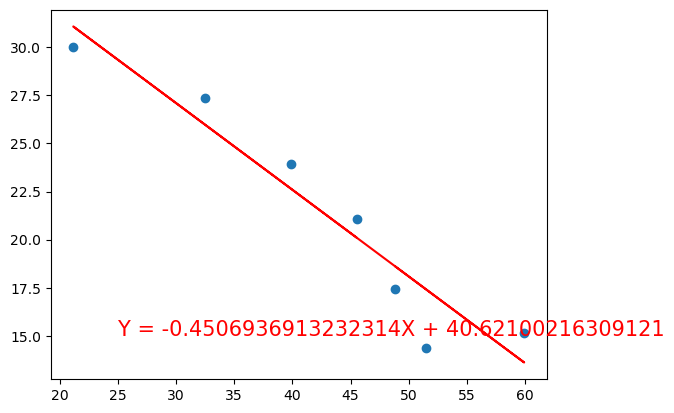

In [17]:
# Create Plot
plt.scatter(weather_data["lat"], weather_data["temp"])
plt.plot(weather_data["lat"], estimated_values, color="red")

# Label plot and annotate the line equation
plt.annotate("Y = " + str(slope) + "X + " + str(intercept), (25,15), fontsize=15, color="red")

# Print r value


# Show plot


In [13]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_estimated_temp = slope*florence_lat + intercept
print(f"The Predicted temperature for Florence will be {florence_estimated_temp}")


The Predicted temperature for Florence will be 20.894139293873373


In [14]:
from pprint import pprint

In [15]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.7667, 'lon': 11.25},
 'dt': 1689214602,
 'id': 3176959,
 'main': {'feels_like': 23.62,
          'humidity': 68,
          'pressure': 1014,
          'temp': 23.44,
          'temp_max': 24.85,
          'temp_min': 20.75},
 'name': 'Florence',
 'sys': {'country': 'IT',
         'id': 6804,
         'sunrise': 1689219877,
         'sunset': 1689274581,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0, 'speed': 0.51}}
